In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
def load_data():
    df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'], index_col='date')
    return df

df = load_data()
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [7]:
def clean_data(df):
    lower_bound = df['value'].quantile(0.025)
    upper_bound = df['value'].quantile(0.975)
    df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]
    return df_cleaned

df_cleaned = clean_data(df)
df_cleaned

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


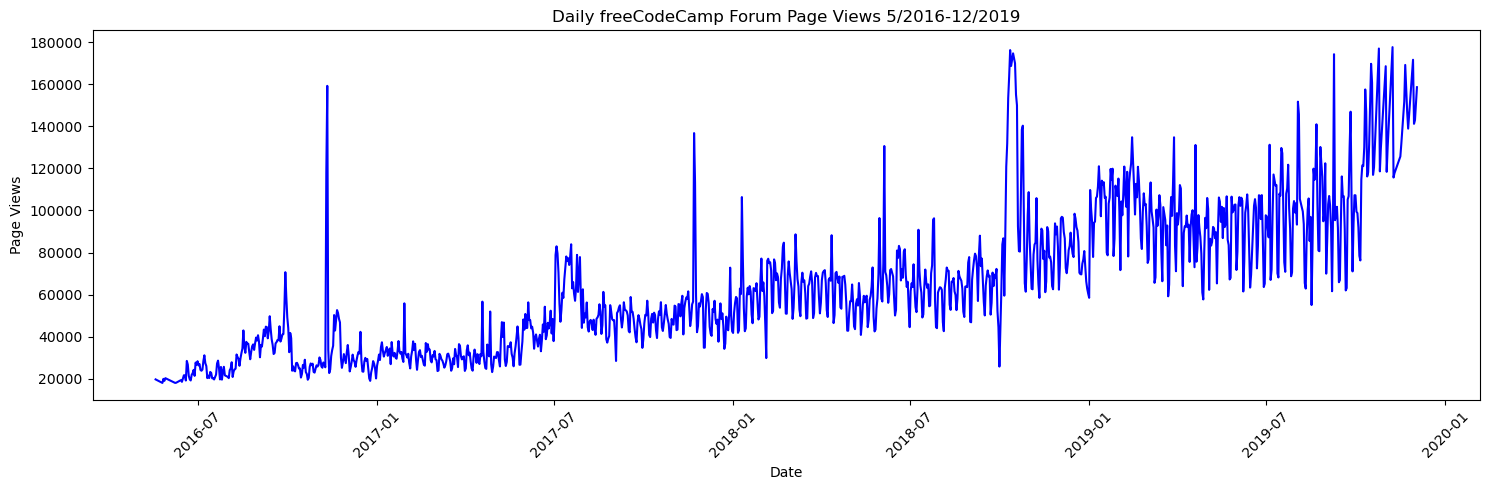

In [17]:
def draw_line_plot():
    plt.figure(figsize=(15, 5))
    plt.plot(df_cleaned.index, df_cleaned['value'], color='blue')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('line_plot.png')
  
draw_line_plot()
plt.show()

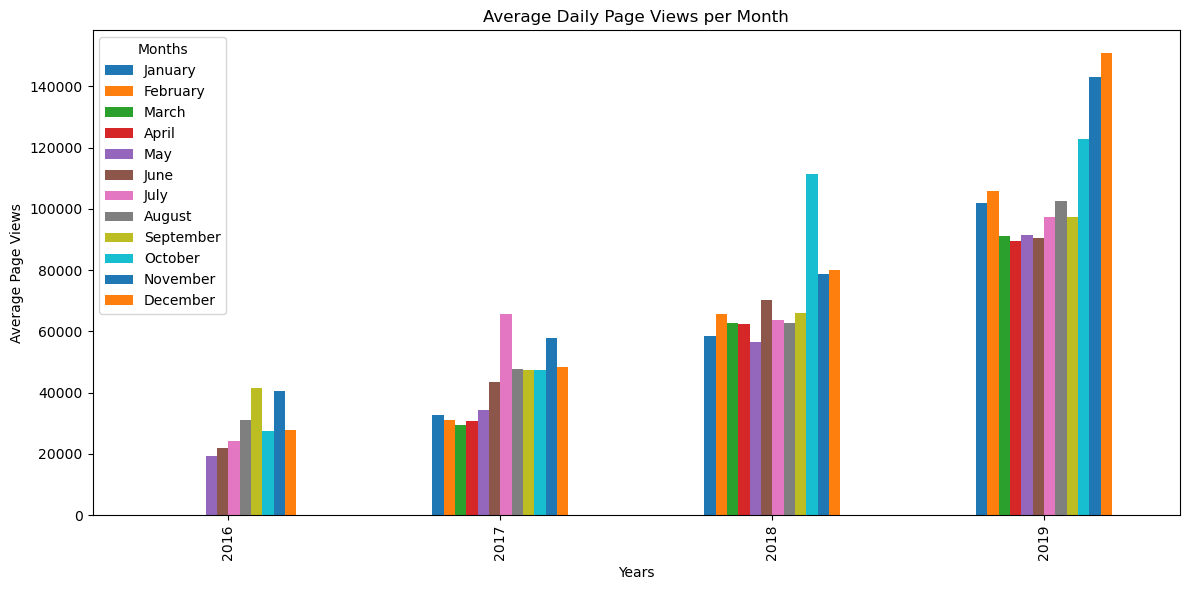

In [22]:
def draw_bar_plot():
    df_bar = df_cleaned.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    
    # Group by year and month, then calculate the mean
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    
    # Sort months in the correct order
    months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                    'July', 'August', 'September', 'October', 'November', 'December']
    df_bar = df_bar[months_order]
    
    df_bar.plot(kind='bar', figsize=(12, 6))
    plt.title('Average Daily Page Views per Month')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    plt.tight_layout()
    plt.savefig('bar_plot.png')
draw_bar_plot()   
plt.show()

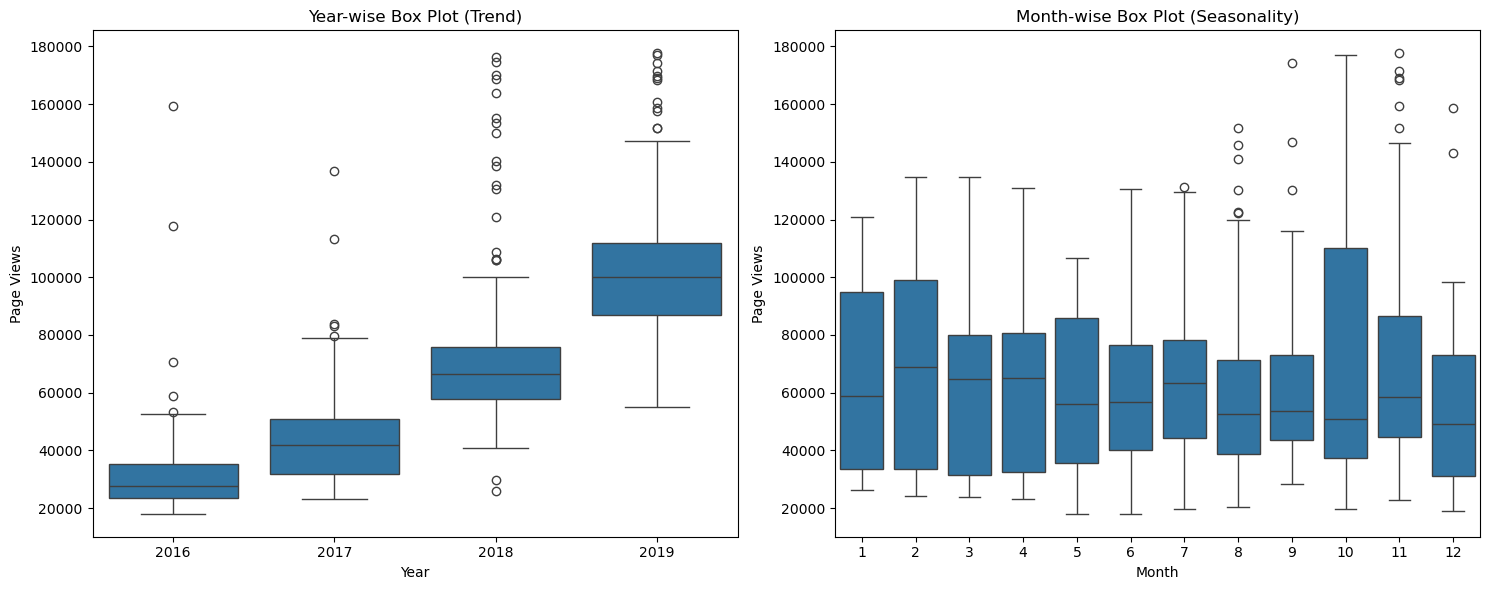

In [26]:
def draw_box_plot():
    df_box = df_cleaned.copy()
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.month
    
    # Create a figure with two subplots
    plt.figure(figsize=(15, 6))
    
    # Year-wise box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='year', y='value', data=df_box)
    plt.title('Year-wise Box Plot (Trend)')
    plt.xlabel('Year')
    plt.ylabel('Page Views')
    
    # Month-wise box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x='month', y='value', data=df_box, order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
    plt.title('Month-wise Box Plot (Seasonality)')
    plt.xlabel('Month')
    plt.ylabel('Page Views')
    
    plt.tight_layout()
    plt.savefig('box_plot.png')
draw_box_plot()
plt.show()